# Student's Percentage Prediction Model

TASK 1

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Import requried Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro

Load the data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print('The size of Dataframe is: ', data.shape)
print('\n')
data.info()

The size of Dataframe is:  (25, 2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
print("Null Value Present:", data.isnull().values.any())
print("Duplicates Present:", data.duplicated().any())

Null Value Present: False
Duplicates Present: False


In [5]:
# To find descriptive statistic summary on the data I used function below:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Visualization**

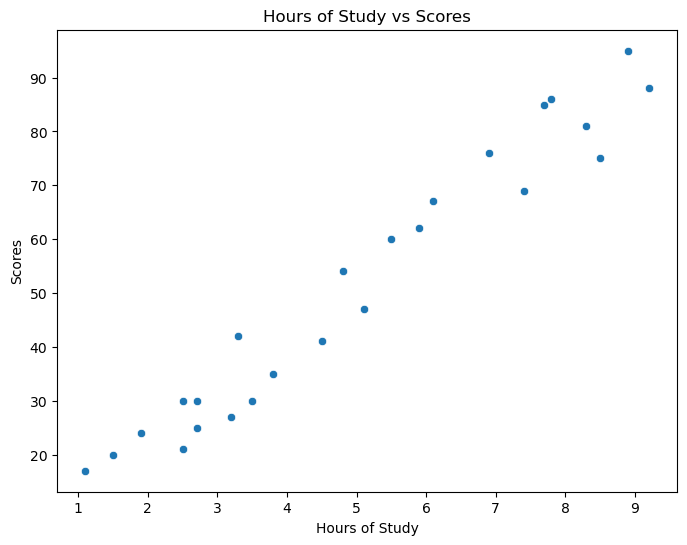

In [6]:
# Scatter plot of Hours vs Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Hours of Study vs Scores')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.show()

From the data depicted in the figure, it is apparent that a positive linear relationship exists between the number of hours studied and the percentage of score obtained.

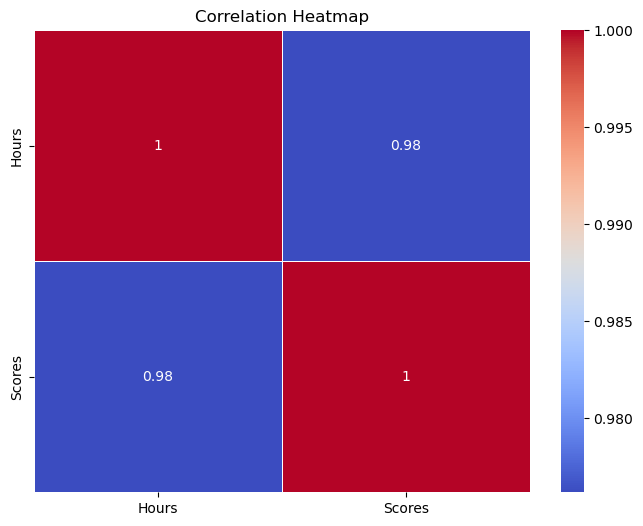

In [7]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Based on the data observed, there exists a correlation coefficient of 0.98 between the variable "hours" and the variable "scores."

**Linear Regression model**

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=42)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

In [12]:
# Comparing Actual vs Predicted Values :
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [13]:
print("Training Score :", model.score(X_train, y_train))
print("Testing Score :", model.score(X_test, y_test))

Training Score : 0.9491209376364416
Testing Score : 0.9678055545167994


The training score of 0.949 indicates a strong fit to the training data, explaining approximately 94.9% of its variance. The higher testing score of 0.968 demonstrates that the model performs even better on unseen data, suggesting its ability to generalize well.

In [14]:
# Let's see coefficients and Intercept
print('Intercept: ', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept:  2.826892353899737
Coefficients: 
 [9.68207815]


**Interpretation** - Based on the obtained results, it can be inferred that with no hours of study, the anticipated exam score is approximately 2.83. Moreover, for each additional hour dedicated to studying, the expected exam score is expected to increase by about 9.68 points, under the assumption that all other factors remain unchanged. This observation indicates a notable positive correlation between the hours spent studying and the resulting exam scores.

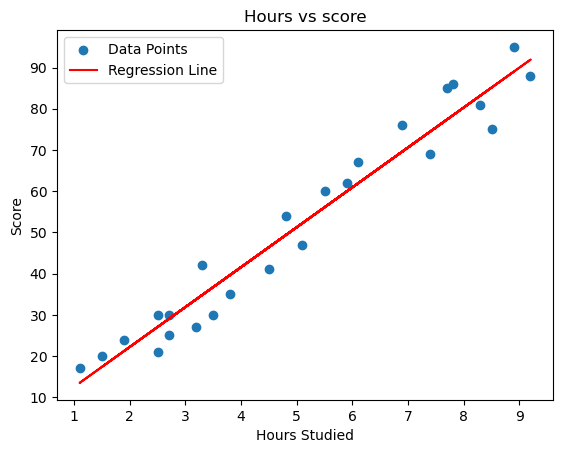

In [15]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y, label='Data Points')
plt.plot(X, line,color="red", label='Regression Line')
plt.title('Hours vs score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')
plt.legend()
plt.show()

**Checking of Assumption**


To assess whether the simple linear regression model satisfies its assumptions, we typically consider several diagnostic checks


In [16]:
import seaborn as sns

def plot_diagnostics(y_true, y_pred, residuals, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Scatter plot of actual vs. predicted
    axes[0].scatter(y_true, y_pred)
    axes[0].plot(y_true, y_true, color='red', linestyle='--')
    axes[0].set_title('Actual vs. Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')

    # Residuals vs. Fitted plot
    axes[1].scatter(y_pred, residuals)
    axes[1].axhline(y=0, color='r', linestyle='-')
    axes[1].set_title('Residuals vs. Fitted')
    axes[1].set_xlabel('Fitted values')
    axes[1].set_ylabel('Residuals')

    # Histogram of Residuals
    sns.histplot(residuals, kde=True, ax=axes[2])
    axes[2].set_xlabel('Residuals')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Histogram')

    fig.suptitle(title, fontweight='bold')
    plt.tight_layout()
    plt.show()

# You can call this function with appropriate parameters to generate the diagnostic plots with the histogram of residuals.


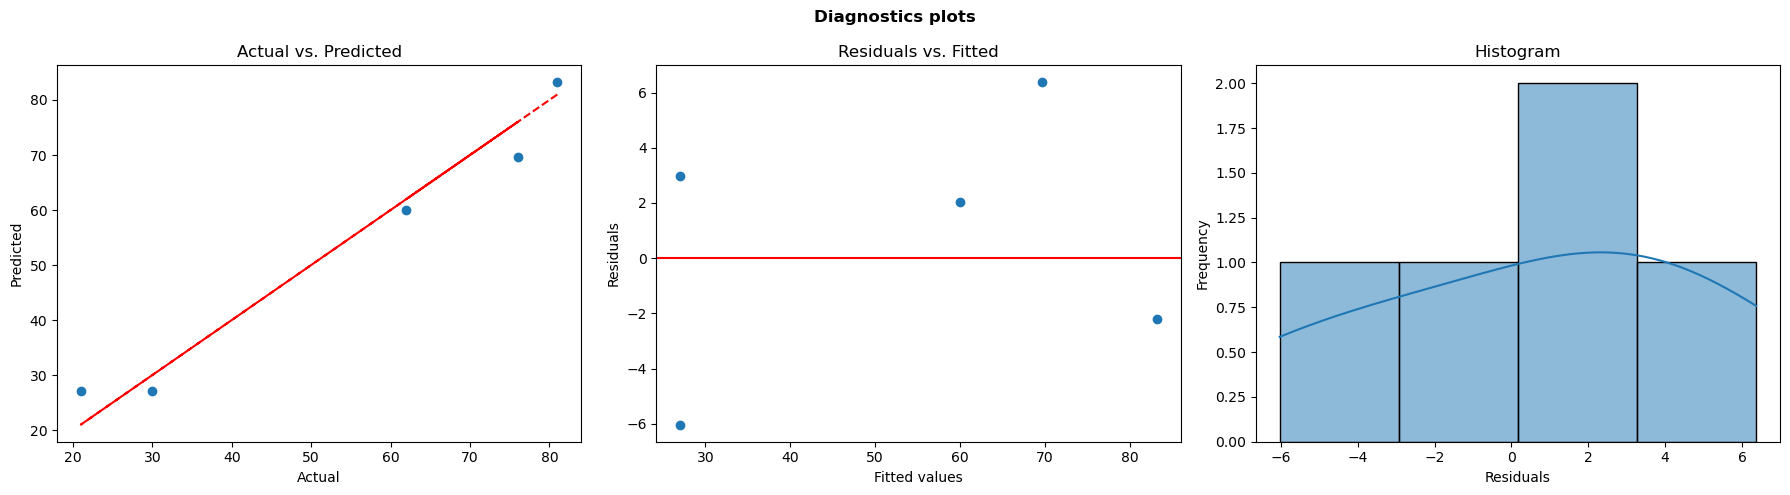

In [17]:
# Plot diagnostics for test set
plot_diagnostics(y_test, y_pred, residuals, title='Diagnostics plots')

In the Actual vs. Predicted plot, points are closely clustered around the diagonal line. In the Residuals vs. Fitted plot, points are randomly scattered around the horizontal line (residuals = 0), and the histogram of residuals is approximately bell-shaped.

*Autocorrelation test*

In [18]:
# Durbin-watson test for auto-correlation
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 2.9557919940076576


the Durbin-Watson statistic is approximately 2.96, which is very close to 2. This suggests that there is likely no significant autocorrelation present in the residuals of your linear regression model.

*Normality test* 

In [19]:
# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(residuals)

print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("The residuals are normally distributed (fail to reject H0)")
else:
    print("The residuals are not normally distributed (reject H0)")


Shapiro-Wilk Test Statistic: 0.9703914523124695
p-value: 0.877760112285614
The residuals are normally distributed (fail to reject H0)


All the assumptions of the simple linear regression model are statisfied

**Model Evaluation**

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae= mean_absolute_error(y_true= y_test, y_pred= y_pred)
rmse = np.sqrt(mean_squared_error(y_true= y_test, y_pred= y_pred))
evs=explained_variance_score(y_true= y_test, y_pred= y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Value: {r2}')
print(f'Explaned Variance Score: {evs}')


Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-squared Value: 0.9678055545167994
Explaned Variance Score: 0.9684858031070392


Based on the provided metrics, the model demonstrates strong predictive performance. The Mean Absolute Error (MAE) of approximately 3.92 units indicates a modest average deviation from the actual values. The Root Mean Squared Error (RMSE) of around 4.35 suggests that the model's predictions are generally close to the observed values. Furthermore, the high R-squared value of 0.97 signifies that approximately 97% of the variance in the dependent variable is accounted for by the independent variables, indicating a robust fit. Additionally, the Explained Variance Score of 0.97 further corroborates the model's capability to capture the variation in the data.


**Question: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [21]:
# Predict the score for 9.25 hours of study
hours_to_predict = np.array([[9.25]])
predicted_score = model.predict(hours_to_predict)

print(f'Predicted Score for 9.25 hours of study: {predicted_score[0]}')


Predicted Score for 9.25 hours of study: 92.38611528261494


If a student studies for 9.25 hours per day, the predicted score, based on the linear regression model, is approximately 92.386.